In [1]:
import math


import numpy as np
import matplotlib.pyplot as plt


<Figure size 1440x144 with 0 Axes>

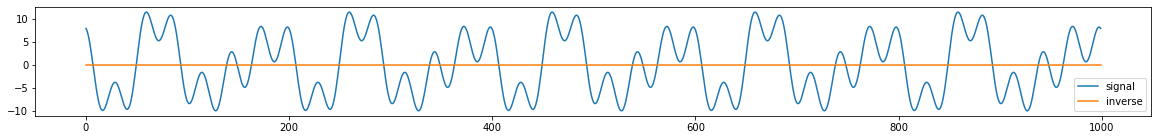

In [98]:
x_range = np.linspace(0,10*np.pi,1000)
signal = 1*np.sin(x_range)
signal += 3*np.cos(x_range*3)
signal += 5*np.cos(x_range*7)
signal += -7*np.sin(x_range*2)

plt.figure(figsize = (20, 2))

fft_result = np.fft.fft(signal)
inverse_fft_result = np.fft.ifft(fft_result)
plt.figure(figsize = (20, 2))
plt.plot(signal, label = 'signal')
plt.plot(inverse_fft_result.imag, label = 'inverse')
plt.legend()

# FFT(Signal)

In [87]:
print(x_range.shape)
print(fft_result.shape)

print(fft_result[1])
print(fft_result[1].real)
print(fft_result[1].imag)
print(np.sqrt(fft_result[1].real**2 + fft_result[1].imag**2))
print(np.abs(fft_result[1]))



(1000,)
(1000,)
(8.015825457307516+0.5232118162819339j)
8.015825457307516
0.5232118162819339
8.032882942425857
8.032882942425857


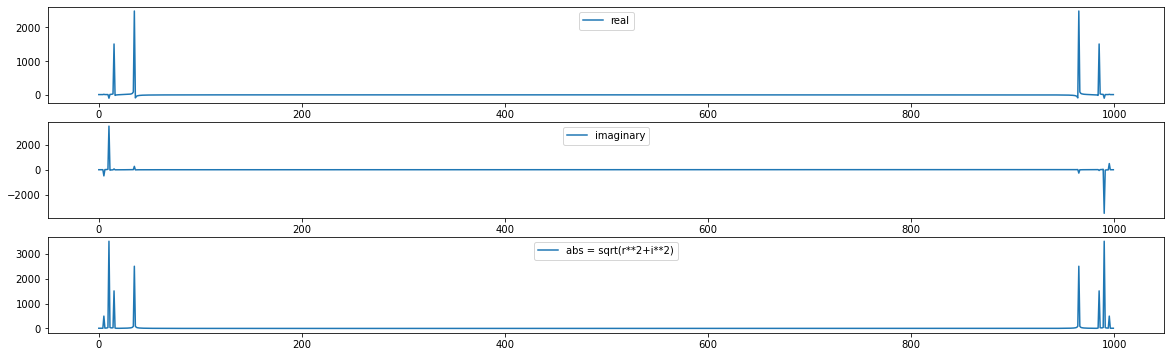

In [88]:
plt.figure(figsize = (20, 6))

plt.subplot(3,1,1)
plt.plot(fft_result.real, label = 'real')
plt.legend(loc = 'upper center')

plt.subplot(3,1,2)
plt.plot(fft_result.imag, label = 'imaginary')
plt.legend(loc = 'upper center')

plt.subplot(3,1,3)
plt.plot(np.abs(fft_result), label = 'abs = sqrt(r**2+i**2)')
plt.legend(loc = 'upper center')


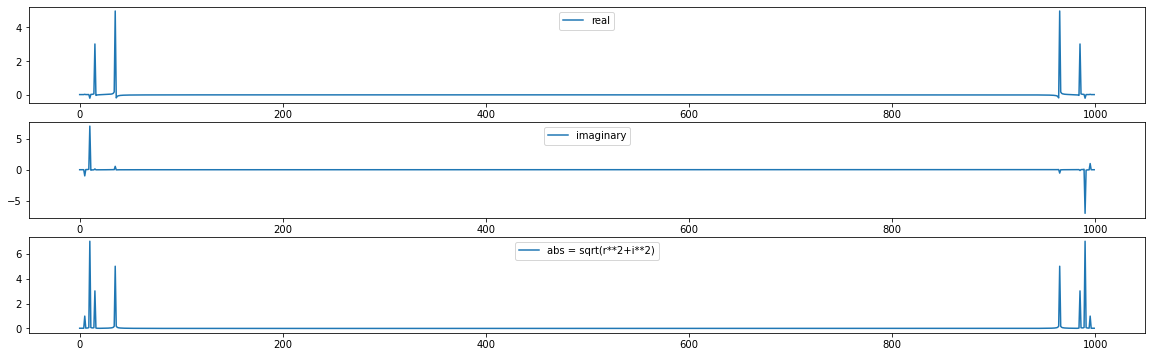

In [89]:
plt.figure(figsize = (20, 6))

normalize = len(fft_result)/2

plt.subplot(3,1,1)
plt.plot(fft_result.real/normalize, label = 'real')
plt.legend(loc = 'upper center')

plt.subplot(3,1,2)
plt.plot(fft_result.imag/normalize, label = 'imaginary')
plt.legend(loc = 'upper center')

plt.subplot(3,1,3)
plt.plot(np.abs(fft_result)/normalize, label = 'abs = sqrt(r**2+i**2)')
plt.legend(loc = 'upper center')


In [90]:
frequency = np.fft.fftfreq(signal)

ValueError: n should be an integer

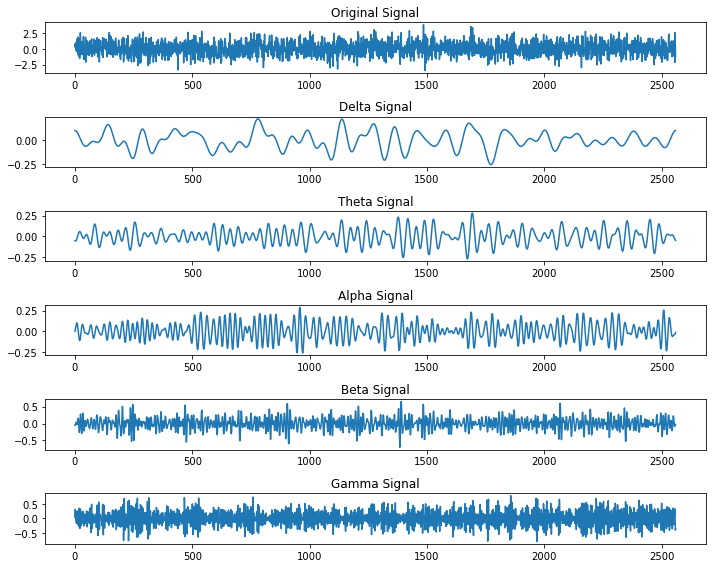

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency bands
DELTA = (0.5, 4)
THETA = (4, 8)
ALPHA = (8, 13)
BETA = (13, 30)
GAMMA = (30, 60)
BANDS = {'Delta': DELTA, 'Theta': THETA, 'Alpha': ALPHA, 'Beta': BETA, 'Gamma': GAMMA}

# Let's assume you have EEG data
fs = 256.0  # Sample rate (Hz)
eeg_data = np.random.normal(size=int(fs*10))  # 10s of data

# Perform FFT
yf = np.fft.fft(eeg_data)
xf = np.fft.fftfreq(len(eeg_data), 1 / fs)

# Initialize dictionary for results
results = {}

for band, (low, high) in BANDS.items():
    # Create a copy of the original (complex) FFT results
    band_fft = yf.copy()

    # Zero out all frequencies that are not in this band
    band_fft[(xf < low) | (xf > high)] = 0

    # Inverse FFT to get back to time domain
    band_signal = np.fft.ifft(band_fft)

    # Store the result
    results[band] = band_signal.real  # .real is used to get rid of the small imaginary part due to numerical errors

# results now contains the time-domain signals for each band
X1 = results['Delta']
X2 = results['Theta']
X3 = results['Alpha']
X4 = results['Beta']
X5 = results['Gamma']

# Plot original signal
plt.figure(figsize=(10, 8))
plt.subplot(len(BANDS)+1, 1, 1)  # +1 is for the original signal
plt.plot(eeg_data)
plt.title('Original Signal')

# Plot decomposed signals
for i, (band, signal) in enumerate(results.items(), 2):  # Starts from 2 because we already plotted the original signal
    plt.subplot(len(BANDS)+1, 1, i)
    plt.plot(signal)
    plt.title(f'{band} Signal')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Amplitude')

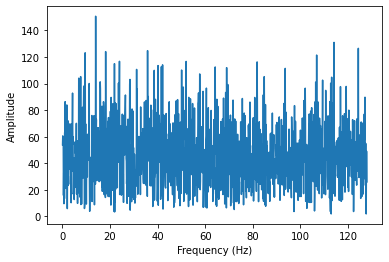

In [112]:

# Let's assume you have EEG data
fs = 256.0  # Sample rate (Hz)
eeg_data = np.random.normal(size=int(fs*10))  # 10s of data

yf = np.fft.fft(eeg_data)
xf = np.fft.fftfreq(len(eeg_data), 1 / fs)


mask = xf > 0
xf = xf[mask]
yf = yf[mask]

plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

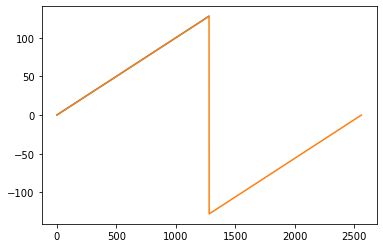

In [109]:
plt.plot(xf[xf>0])
plt.plot(xf)

In [115]:
import numpy as np

# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.
  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.
    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal
    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal
    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

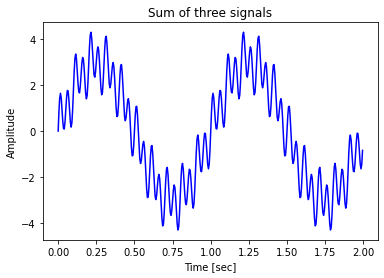

In [116]:
# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

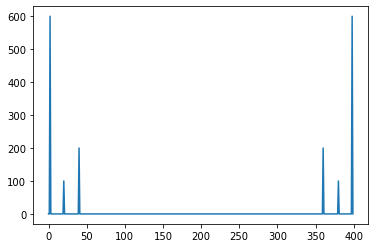

In [126]:
yf = np.fft.fft(signal)
plt.plot(np.abs(yf))

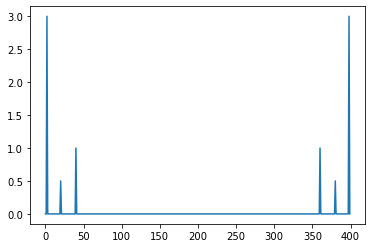

In [134]:
yf = np.fft.fft(signal)
plt.plot(np.abs(yf) / (len(yf)/2))

Text(0, 0.5, 'Amplitude')

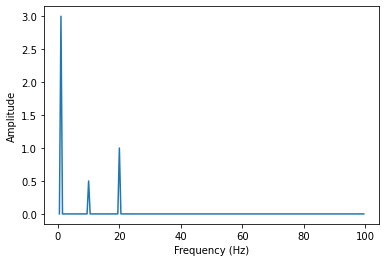

In [140]:
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(len(signal), 1 / 200)

total_len = len(xf)


mask = xf > 0
xf = xf[mask]
yf = yf[mask]

plt.plot(xf, np.abs(yf) / (total_len/2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')